In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
# Load the dataset
file_path = "data/uber.csv"
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [55]:
df.dropna(inplace=True)

In [56]:
df['passenger_count'].value_counts()

passenger_count
1      138425
2       29428
5       14009
3        8881
4        4276
6        4271
0         708
208         1
Name: count, dtype: int64

In [57]:
# delete row containing passenger count as 208
df = df[df['passenger_count'] != 208]


In [58]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])  # Convert degrees to radians

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c  # Distance in kilometers

df["distance_km"] = haversine_distance(df["pickup_latitude"], df["pickup_longitude"],
                                       df["dropoff_latitude"], df["dropoff_longitude"])

In [59]:
# Convert pickup_datetime to datetime format
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], errors="coerce")

df["year"] = df["pickup_datetime"].dt.year
df["month"] = df["pickup_datetime"].dt.month
df["day"] = df["pickup_datetime"].dt.day
df["day_of_week"] = df["pickup_datetime"].dt.dayofweek
df["hour"] = df["pickup_datetime"].dt.hour

In [60]:
# Check the date range of the dataset
df["pickup_datetime"].min(), df["pickup_datetime"].max()

(Timestamp('2009-01-01 01:15:22+0000', tz='UTC'),
 Timestamp('2015-06-30 23:40:39+0000', tz='UTC'))

In [61]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,year,month,day,day_of_week,hour
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,2015,5,7,3,19
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,2009,7,17,4,20
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,2009,8,24,0,21
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,2009,6,26,4,8
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,2014,8,28,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.112210,2012,10,28,6,10
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1.875050,2014,3,14,4,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,12.850319,2009,6,29,0,0
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,3.539715,2015,5,20,2,14


In [62]:
# # Define surge factor based on time of day
# def assign_surge_factor(hour):
#     if 0 <= hour < 6:
#         return 1.2  # Late Night
#     elif 6 <= hour < 10:
#         return 1.5  # Morning Peak
#     elif 10 <= hour < 16:
#         return 1.1  # Midday/Daytime
#     elif 16 <= hour < 20:
#         return 1.6  # Evening Peak
#     else:
#         return 1.3  # Night

# # Apply surge factor mapping
# df["Surge_Factor"] = df["hour"].apply(assign_surge_factor)



In [63]:
from scripts.pre_process import calculate_surge_factor

df['Surge_Factor'] = df.apply(lambda row: calculate_surge_factor(row['pickup_datetime'], row['passenger_count']), axis=1)

In [64]:
# inflation
# CPI data for each year
cpi_data = {
    2009: 214.537,
    2010: 218.056,
    2011: 224.939,
    2012: 229.594,
    2013: 232.957,
    2014: 236.736,
    2015: 237.017
}

cpi_2025 = 319.082  # Projected CPI for 2025

# Map inflation factor using CPI data
df['inflation_factor'] = df['year'].map(lambda y: cpi_2025 / cpi_data.get(y, 237.017))  # Default to 2015 CPI if missing


In [ ]:
# Define the columns to drop
cols_to_drop = [
    'Unnamed: 0', 'key', 'pickup_datetime',
    "pickup_longitude", "pickup_latitude",
    "dropoff_longitude", "dropoff_latitude",
    "day", "hour"  # 'day' is redundant with 'day_of_week', and 'hour' is represented by 'Surge_Factor'
]

# Drop the irrelevant columns
df_cleaned = df.drop(columns=cols_to_drop)

In [66]:
df_cleaned

,fare_amount,passenger_count,distance_km,year,month,day_of_week,Surge_Factor,inflation_factor
0,7.5,1,1.683323,2015,5,3,2.0,1.346241
1,7.7,1,2.457590,2009,7,4,2.0,1.487305
2,12.9,1,5.036377,2009,8,0,2.0,1.487305
3,5.3,3,1.661683,2009,6,4,1.5,1.487305
4,16.0,5,4.475450,2014,8,3,1.8,1.347839
...,...,...,...,...,...,...,...,...
199995,3.0,1,0.112210,2012,10,6,1.5,1.389766
199996,7.5,1,1.875050,2014,3,4,1.0,1.347839
199997,30.9,2,12.850319,2009,6,0,1.5,1.487305
199998,14.5,1,3.539715,2015,5,2,1.5,1.346241


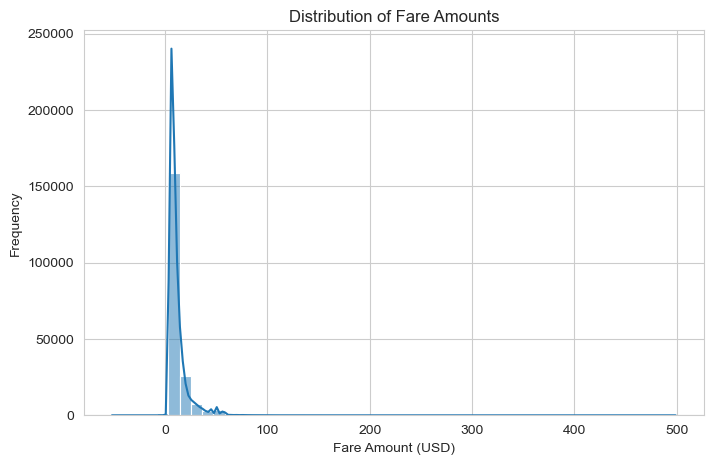

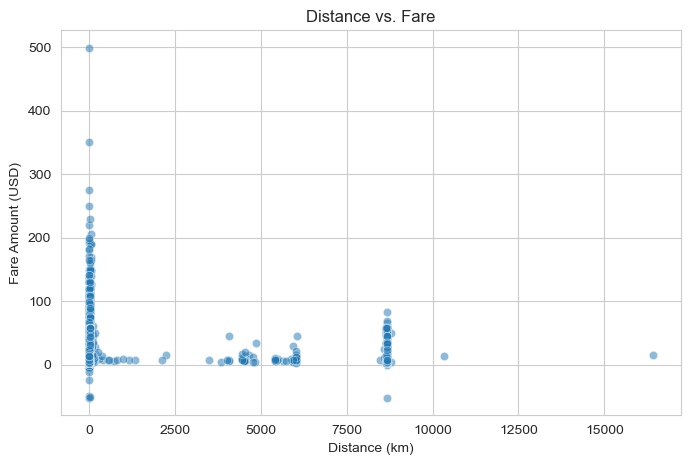

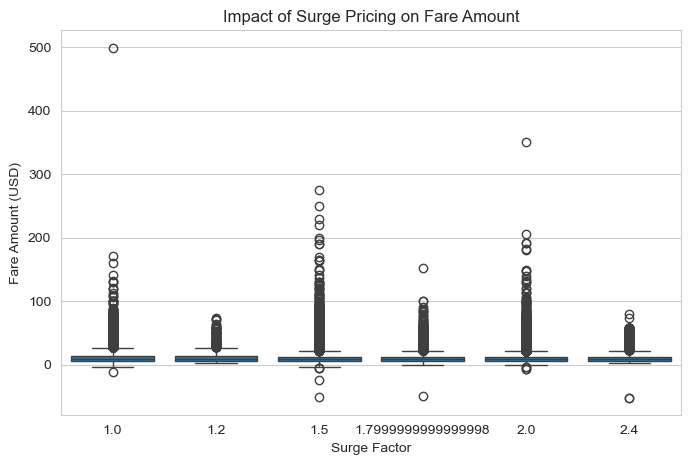

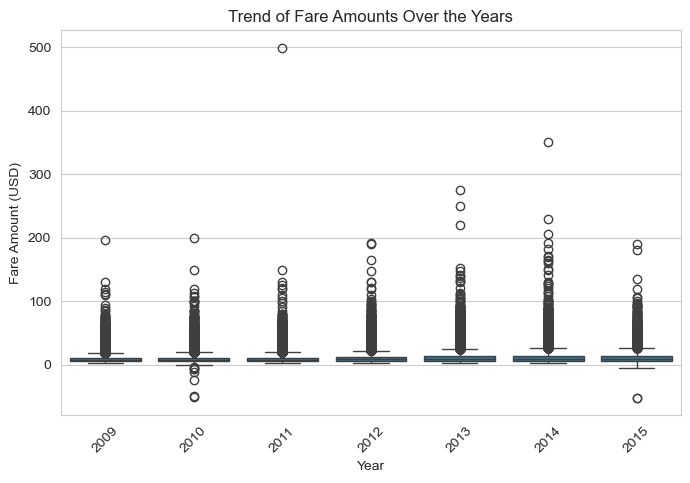

/var/folders/57/kxv96qw15fgbnvfp982zqnhm0000gp/T/ipykernel_27878/1591849983.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["hour"], palette="viridis")


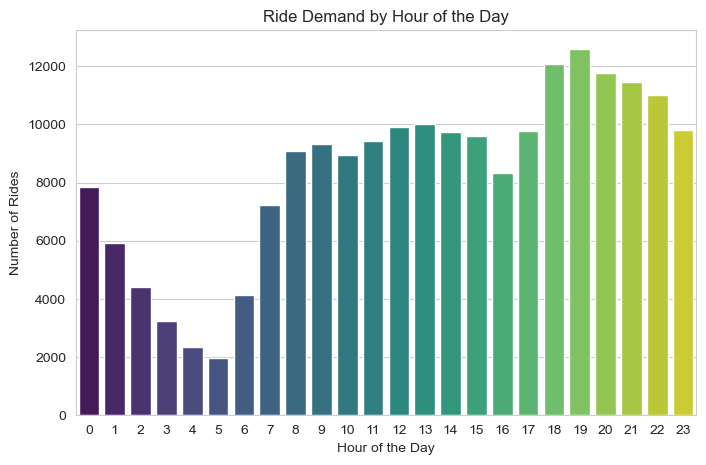

/var/folders/57/kxv96qw15fgbnvfp982zqnhm0000gp/T/ipykernel_27878/1591849983.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["day_of_week"], palette="coolwarm")


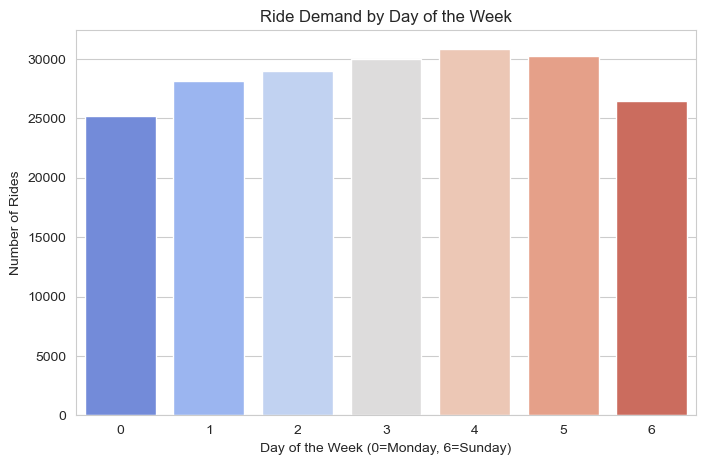

In [67]:
# Set Seaborn style
sns.set_style("whitegrid")

# Plot 1: Fare Amount Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["fare_amount"], bins=50, kde=True)
plt.xlabel("Fare Amount (USD)")
plt.ylabel("Frequency")
plt.title("Distribution of Fare Amounts")
plt.show()

# Plot 2: Distance vs. Fare
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["distance_km"], y=df["fare_amount"], alpha=0.5)
plt.xlabel("Distance (km)")
plt.ylabel("Fare Amount (USD)")
plt.title("Distance vs. Fare")
plt.show()

# Plot 3: Surge Factor vs. Fare
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Surge_Factor"], y=df["fare_amount"])
plt.xlabel("Surge Factor")
plt.ylabel("Fare Amount (USD)")
plt.title("Impact of Surge Pricing on Fare Amount")
plt.show()

# Plot 4: Yearly Inflation Impact on Fare
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["year"], y=df["fare_amount"])
plt.xlabel("Year")
plt.ylabel("Fare Amount (USD)")
plt.title("Trend of Fare Amounts Over the Years")
plt.xticks(rotation=45)
plt.show()

# Plot 5: Ride Demand by Hour of the Day
plt.figure(figsize=(8, 5))
sns.countplot(x=df["hour"], palette="viridis")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Rides")
plt.title("Ride Demand by Hour of the Day")
plt.show()

# Plot 6: Ride Demand by Day of the Week
plt.figure(figsize=(8, 5))
sns.countplot(x=df["day_of_week"], palette="coolwarm")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Number of Rides")
plt.title("Ride Demand by Day of the Week")
plt.show()


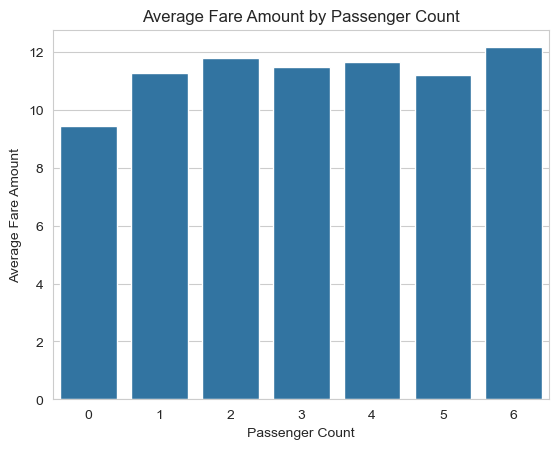

In [68]:
passenger_fare = df.groupby('passenger_count')['fare_amount'].mean().reset_index()

sns.barplot(x='passenger_count', y='fare_amount', data=passenger_fare)
plt.title('Average Fare Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare Amount')
plt.show()


In [69]:
df_cleaned.head()

,fare_amount,passenger_count,distance_km,year,month,day_of_week,Surge_Factor,inflation_factor
0,7.5,1,1.683323,2015,5,3,2.0,1.346241
1,7.7,1,2.457590,2009,7,4,2.0,1.487305
2,12.9,1,5.036377,2009,8,0,2.0,1.487305
3,5.3,3,1.661683,2009,6,4,1.5,1.487305
4,16.0,5,4.475450,2014,8,3,1.8,1.347839


In [70]:
# Save the modified dataset to a new CSV file
df_cleaned.to_csv('data/processed/uber.csv', index=False)

In [71]:
feature_cols = df_cleaned.drop(columns='fare_amount').columns
X = df_cleaned[feature_cols]
y = df_cleaned['fare_amount']

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [73]:
# Split data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [74]:
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)

# Predict on the test set.
y_pred = rf_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

# Optional: Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

RMSE: 5.68
MAE: 2.49


In [75]:
# Check feature importances.
importances = rf_model.feature_importances_
feature_importances = pd.Series(importances, index=feature_cols).sort_values(ascending=False)
print("Feature Importances:")
print(feature_importances)

Feature Importances:
distance_km         0.852773
month               0.040498
day_of_week         0.031585
inflation_factor    0.025840
year                0.018315
Surge_Factor        0.016803
passenger_count     0.014186
dtype: float64


In [76]:
# year and passenger count seems irrelevant. so we can drop these 
# X_train.drop(columns=['passenger_count', 'year'], inplace=True)
# X_test.drop(columns=['passenger_count', 'year'], inplace=True)

In [77]:
# training on all data
model = RandomForestRegressor(random_state=0)
model.fit(X, y)


RandomForestRegressor(random_state=0)

In [78]:
# save the model
joblib.dump(model, 'model/rf_model.pkl')

['model/rf_model.pkl']

In [79]:
X

,passenger_count,distance_km,year,month,day_of_week,Surge_Factor,inflation_factor
0,1,1.683323,2015,5,3,2.0,1.346241
1,1,2.457590,2009,7,4,2.0,1.487305
2,1,5.036377,2009,8,0,2.0,1.487305
3,3,1.661683,2009,6,4,1.5,1.487305
4,5,4.475450,2014,8,3,1.8,1.347839
...,...,...,...,...,...,...,...
199995,1,0.112210,2012,10,6,1.5,1.389766
199996,1,1.875050,2014,3,4,1.0,1.347839
199997,2,12.850319,2009,6,0,1.5,1.487305
199998,1,3.539715,2015,5,2,1.5,1.346241


In [80]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,year,month,day,day_of_week,hour,Surge_Factor,inflation_factor
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,2015,5,7,3,19,2.0,1.346241
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,2009,7,17,4,20,2.0,1.487305
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,2009,8,24,0,21,2.0,1.487305
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,2009,6,26,4,8,1.5,1.487305
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,2014,8,28,3,17,1.8,1.347839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.112210,2012,10,28,6,10,1.5,1.389766
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1.875050,2014,3,14,4,1,1.0,1.347839
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,12.850319,2009,6,29,0,0,1.5,1.487305
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,3.539715,2015,5,20,2,14,1.5,1.346241
